# CS 329E: Term-Project
### Janavi Kolpekwar (jak4884) & Amshula Gajula (ang4334)
##### For our Term project, we have selected a randomized Loan Approval Dataset which contains a collection of financial records and associate information used to determine whether a unique set of individuals are eligible for obtaining loans from a lending institution. Using Machine Learning algorithms and Data Mining techniques we have learned in class this semester, we will select features which we believe significantly affects an applicant’s approval status.


Import necessary libraries
Explore features of dataset (size, total entries, missing values, etc.)

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# load in data set
loan = pd.read_csv("Loan-Approval-Prediction.csv")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Based on the outcome result of our code, we have a total of 614 total observations (rows) and 12 total features (columns) in our dataset. When we first load out dataset and use the load.info() code function to identify the total number of entries in our dataset, we observe features like “Dependents”, “Self-Employed”, “LoanAmount”, and “Credit_History” having the lowest Non-Null Counts in comparison to the other features.

In [5]:
# explore the data set
value_counts = {col: loan[col].value_counts() for col in loan.columns}
for col, counts in value_counts.items():
    print(f"Column '{col}':\n{counts}\n")

Column 'Loan_ID':
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

Column 'Gender':
Gender
Male      489
Female    112
Name: count, dtype: int64

Column 'Married':
Married
Yes    398
No     213
Name: count, dtype: int64

Column 'Dependents':
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Column 'Education':
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Column 'Self_Employed':
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Column 'ApplicantIncome':
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64

Column 'CoapplicantIncome':
CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0 

In [6]:
# missing values
loan.shape
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# drop na
loan_clean = loan.dropna()
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


Once we replace the missing values, there are a total of 480 observations in the data set. Once we utilize loan.dropna(), we notice that all features have the same Non-Null Count making it easier for us to later manipulate the data and fine tune ML models to our dataset.

In [8]:
# numerical variables
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
loan_clean[numeric_columns].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


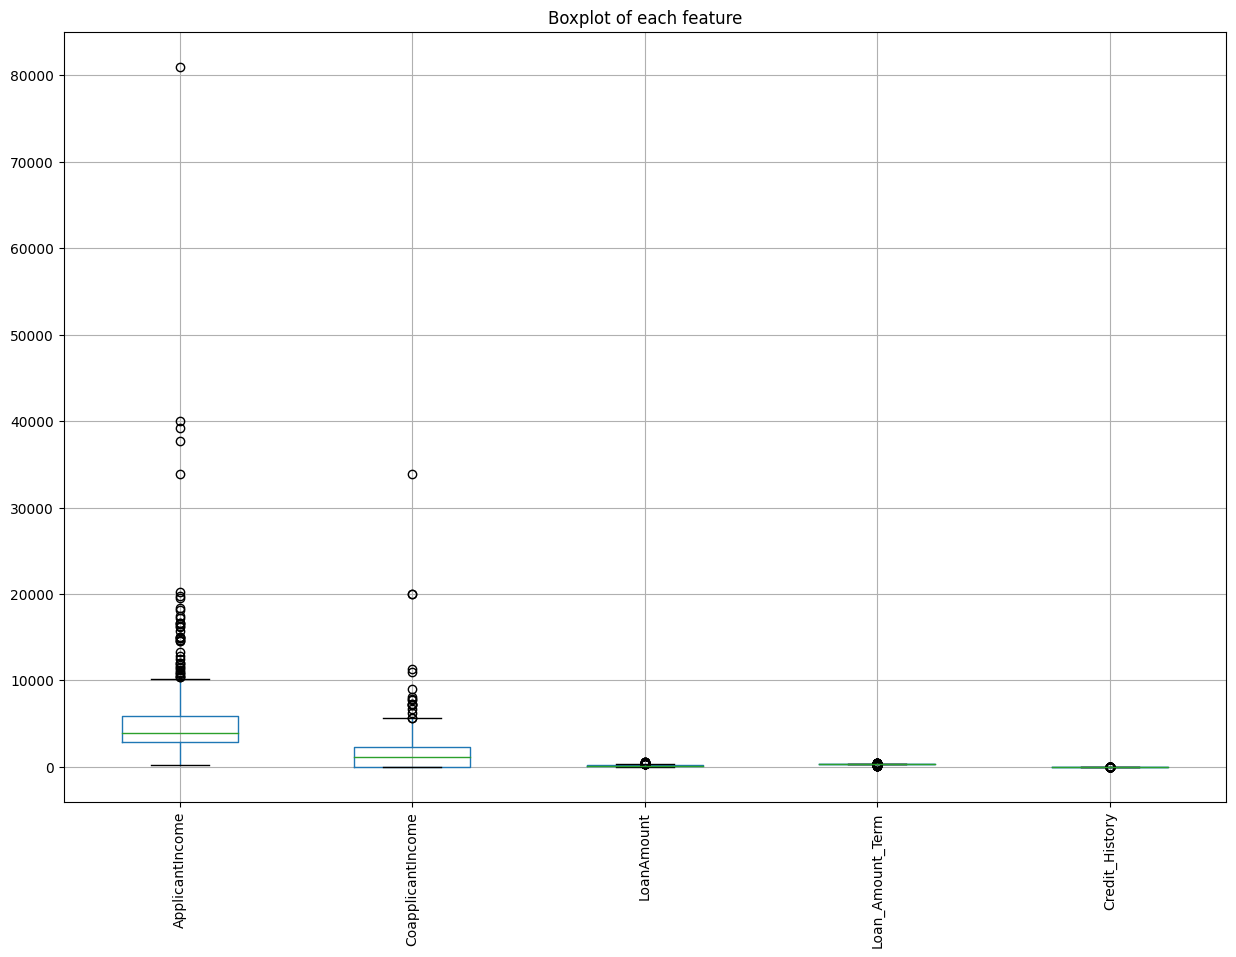

In [9]:
# descriptive statistics
# boxplot for each feature to see their ranges
plt.figure(figsize=(15, 10))
loan_clean.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot of each feature")
plt.show()

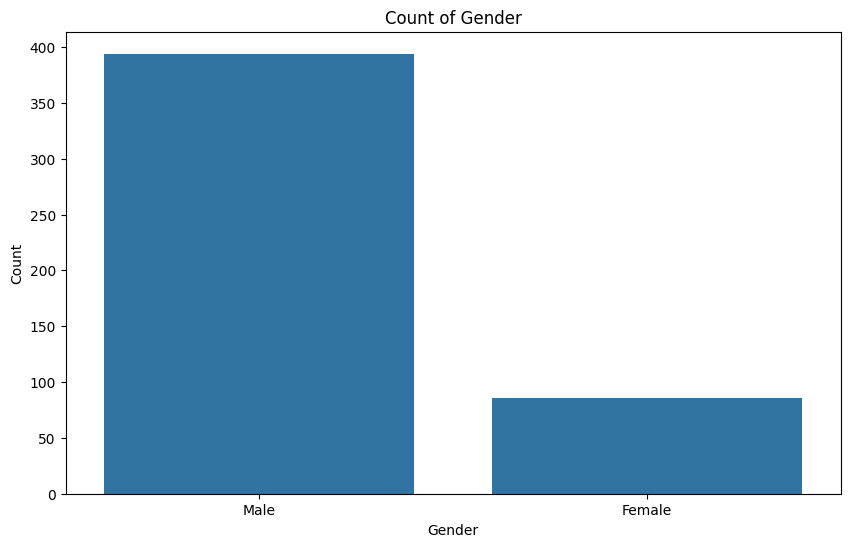

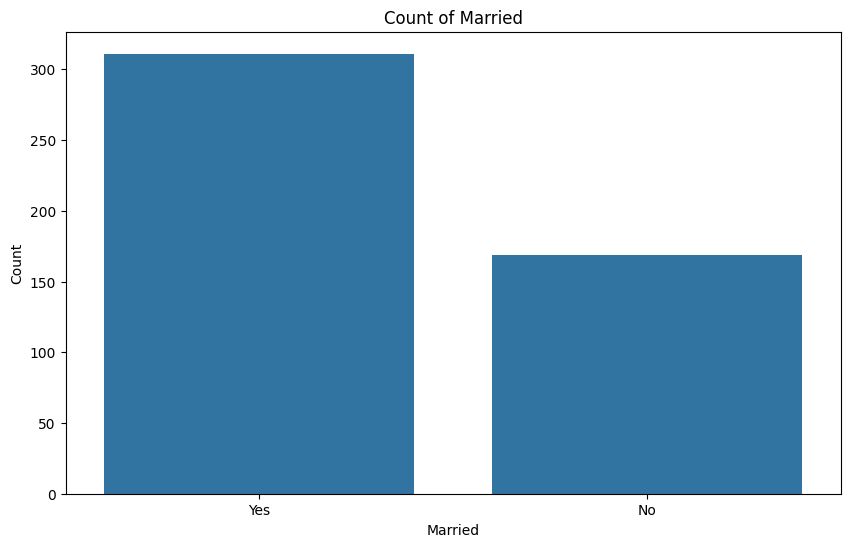

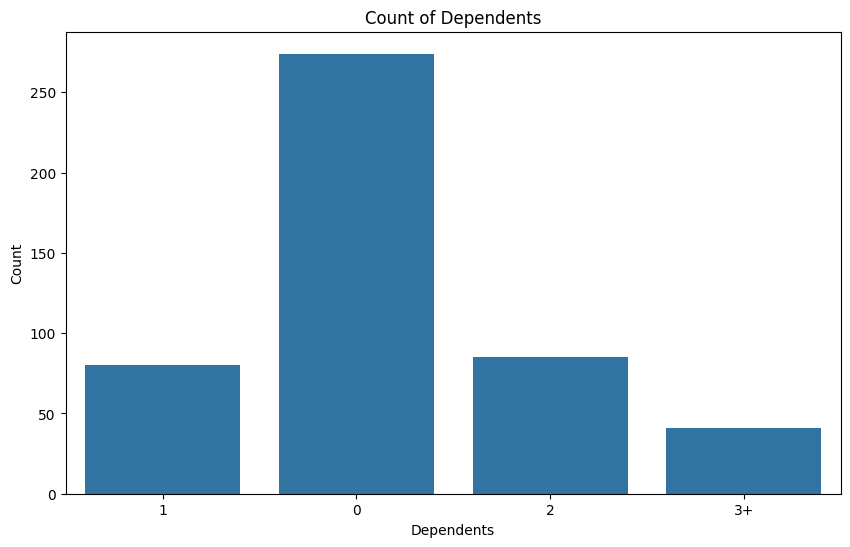

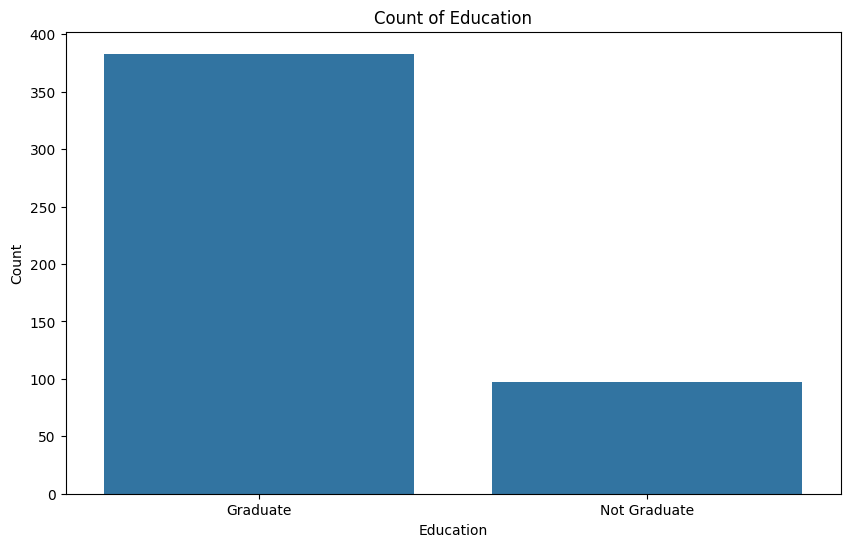

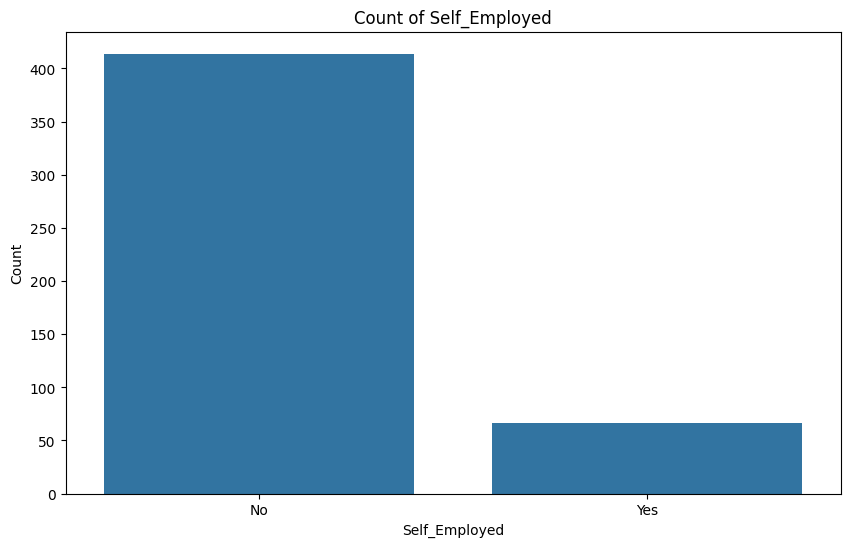

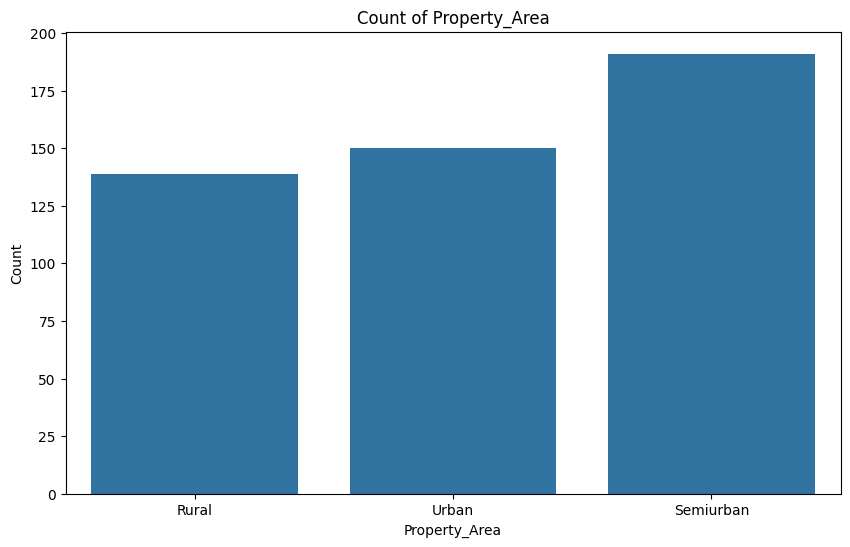

In [10]:
# categorical variables
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=loan_clean, x=column)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [11]:
# encode categorical data
loan_encode = pd.get_dummies(loan_clean, columns=categorical_columns, drop_first=True)
loan_encode = loan_encode.drop(columns=['Loan_ID'])

# convert any boolean columns to integers
loan_encode['Loan_Status'] = loan_encode['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)
for column in loan_encode.select_dtypes(include=['bool']).columns:
    loan_encode[column] = loan_encode[column].astype(int)
loan_encode.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,1,0,1,0,0,1,0,1
6,2333,1516.0,95.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
7,3036,2504.0,158.0,360.0,0.0,0,1,1,0,0,1,0,0,1,0
8,4006,1526.0,168.0,360.0,1.0,1,1,1,0,1,0,0,0,0,1
9,12841,10968.0,349.0,360.0,1.0,0,1,1,1,0,0,0,0,1,0
10,3200,700.0,70.0,360.0,1.0,1,1,1,0,1,0,0,0,0,1


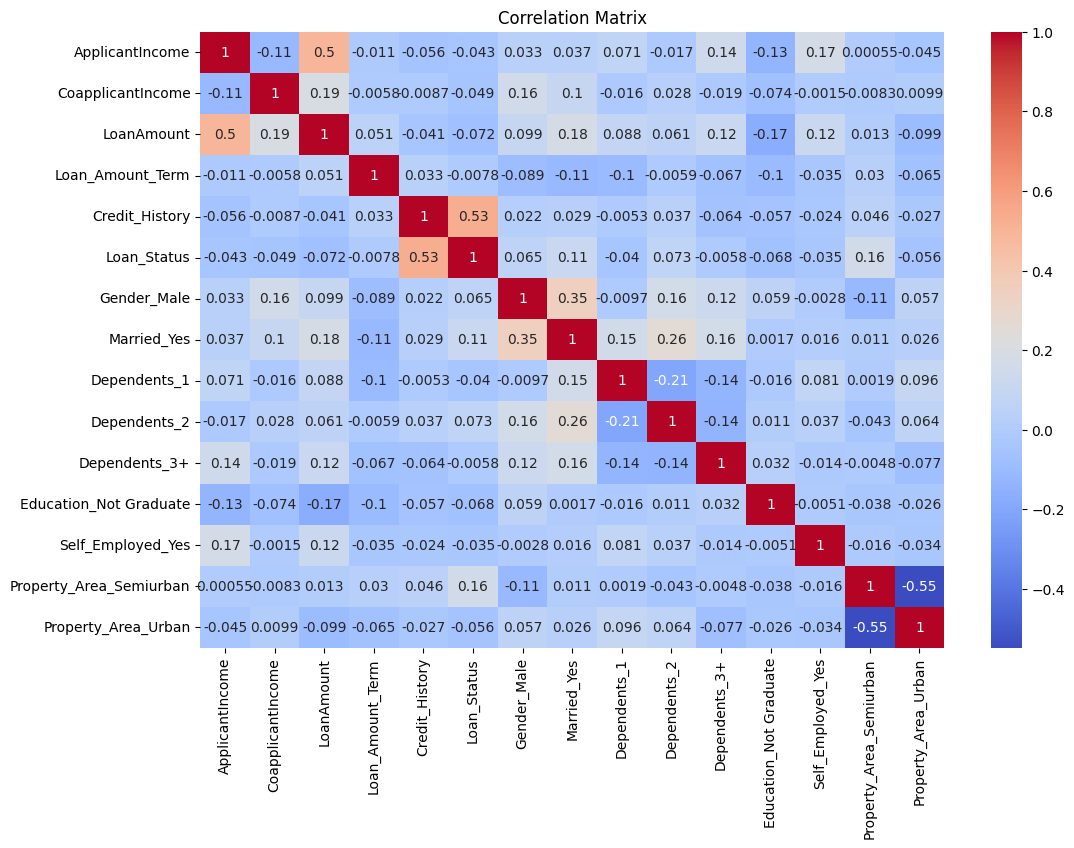

In [12]:
# correlation matrix
correlation_matrix = loan_encode.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Define features and target
X = loan_encode.drop(columns=['Loan_Status'])
y = loan_encode['Loan_Status']

# normalize numerical data
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
X[numeric_columns].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02
mean,2.590520e-17,1.572816e-17,-1.554312e-16,-2.146431e-16,7.586524e-17
std,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00
min,-9.208610e-01,-6.046330e-01,-1.687742e+00,-4.698022e+00,-2.420153e+00
25%,-4.354171e-01,-6.046330e-01,-5.562428e-01,2.755416e-01,4.131969e-01
50%,-2.658318e-01,-1.899046e-01,-2.080892e-01,2.755416e-01,4.131969e-01
75%,8.623086e-02,2.570423e-01,3.141413e-01,2.755416e-01,4.131969e-01
max,1.335768e+01,1.233512e+01,5.660787e+00,2.117602e+00,4.131969e-01


##Splitting our Loan Dataset to have Train/Test datasets

In [14]:
# split into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

### Random Forest Model

Random Forest Model Accuracy: 0.7708
Feature Importances from Random Forest:
                    Feature  Importance
4            Credit_History    0.243735
0           ApplicantIncome    0.202165
2                LoanAmount    0.192195
1         CoapplicantIncome    0.116848
3          Loan_Amount_Term    0.045309
12  Property_Area_Semiurban    0.034702
6               Married_Yes    0.028730
7              Dependents_1    0.024216
13      Property_Area_Urban    0.021874
5               Gender_Male    0.021862
10   Education_Not Graduate    0.021111
11        Self_Employed_Yes    0.018333
8              Dependents_2    0.017200
9             Dependents_3+    0.011720


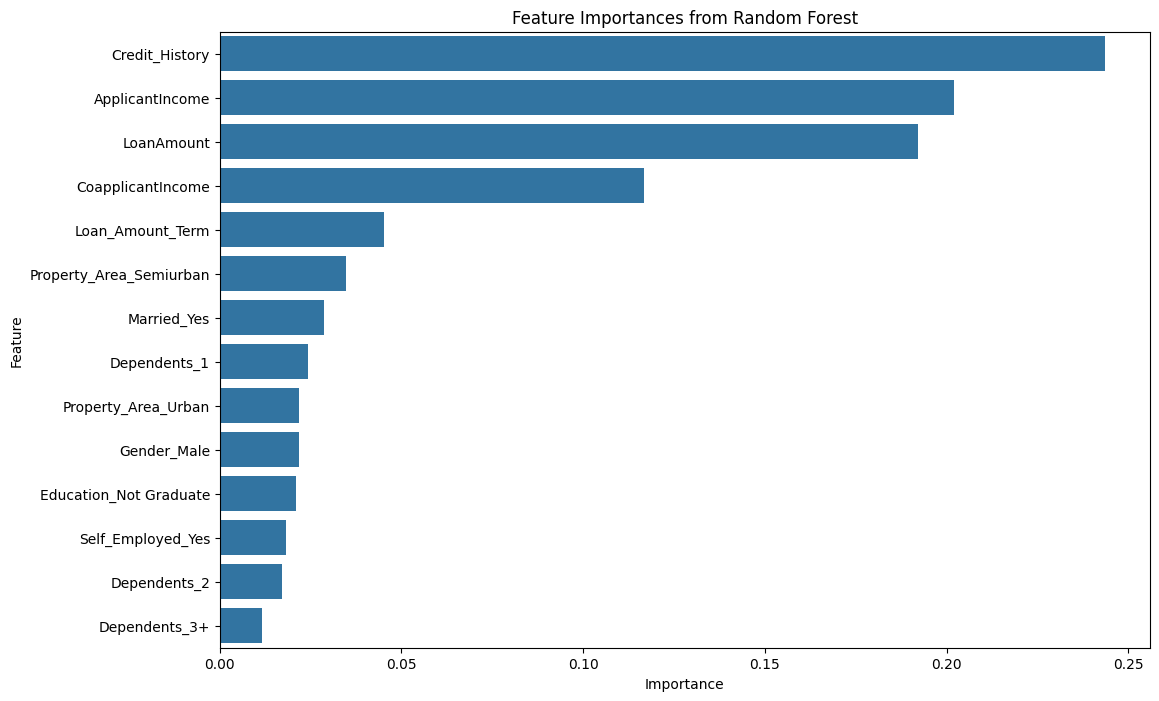

In [15]:
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# rf model
rf_model = RandomForestClassifier(random_state=36)
rf_model.fit(X_train, y_train)

# Predict and calculate accuracy for Random Forest model
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print Random Forest accuracy
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}")

# Get feature importances from Random Forest
importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances from Random Forest:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

### Logistic Regression Classification Model

Logistic Regression Model Accuracy: 0.78125
Logistic Regression Coefficients:
                    Feature  Coefficient
4            Credit_History     1.333458
12  Property_Area_Semiurban     0.839079
9             Dependents_3+     0.432365
5               Gender_Male     0.381638
6               Married_Yes     0.379362
8              Dependents_2     0.325732
0           ApplicantIncome     0.000582
2                LoanAmount    -0.033060
13      Property_Area_Urban    -0.045659
10   Education_Not Graduate    -0.093893
3          Loan_Amount_Term    -0.108480
1         CoapplicantIncome    -0.198506
11        Self_Employed_Yes    -0.249885
7              Dependents_1    -0.548679


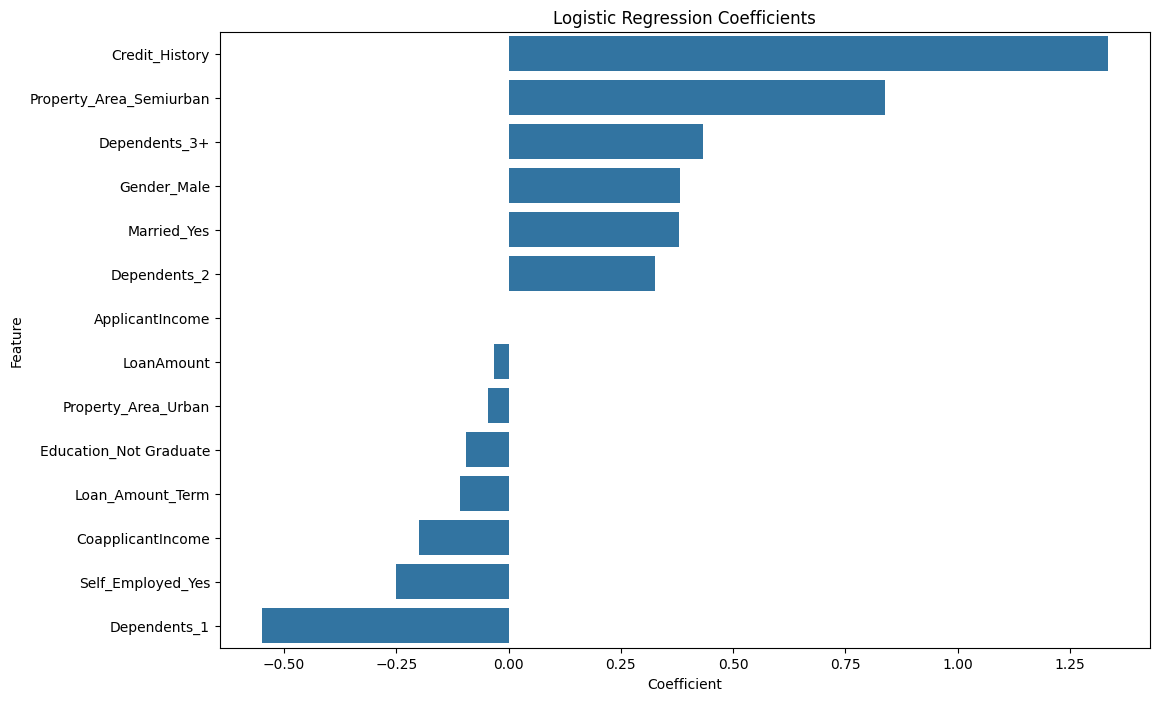

In [22]:
# import log reg model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Model Accuracy: {accuracy:.5f}')

# Get coefficients from Logistic Regression
coefficients = log_reg.coef_[0]
features = X.columns

# Create a DataFrame for visualization
logistic_importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
logistic_importance_df = logistic_importance_df.sort_values(by='Coefficient', ascending=False)

# Print the coefficients
print("Logistic Regression Coefficients:")
print(logistic_importance_df)

# Plot coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=logistic_importance_df)
plt.title('Logistic Regression Coefficients')
plt.show()

### SVM Classification Model

In [17]:
# Import necessary libraries
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model with default parameters
svm_model = svm.SVC()

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Print the SVM accuracy score
print("The SVM model's Accuracy Score is:", round(accuracy_score(y_test, y_pred),2))

The SVM model's Accuracy Score is: 0.77


In [18]:
# Import necessary libraries
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model with the sigmoid kernel
svm_model = svm.SVC(kernel='sigmoid')

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Print the SVM accuracy score
print("The SVM model with kernal function's Accuracy Score is:", accuracy_score(y_test, y_pred))

The SVM model with kernal function's Accuracy Score is: 0.78125


Meaning: The kernel function determines the type of decision boundary. The 'sigmoid' kernel is a type of non-linear kernel that can be useful for certain types of data distributions, especially when the data is not linearly separable.
So in the context in our SVM Model, a highlighting difference between the original SVM fit and the s'sigmoid' kernal fit is 0.01 between accuracy scores.

The 'sigmoid' kernel was chosen as the best option for your data, indicating that the relationship between out features and labels may be non-linear and similar in nature to the transformations used in neural networks. Even though slight, 0.01 increase in accuracy scores, the SVM model fit with kernal function 'sigmoid' is still an improvement.

### KNN Classfication Model

In [19]:
# import KNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neighbor = KNeighborsClassifier(n_neighbors=3)
neighbor.fit(X_train, y_train)
predictions= neighbor.predict(X_test)
sum = np.sum(predictions == y_test)
print("KNN model's Accuracy score:", sum/len(predictions))

# KNN model accuracy score
def knn(k, X_train, X_test, y_train, y_test):
    neighbor = KNeighborsClassifier(n_neighbors=k)
    neighbor.fit(X_train, y_train)
    predictions= neighbor.predict(X_test)
    sum = np.sum(predictions == y_test)
    return sum/len(predictions)
poss_k = [1,3, 8, 13,17, 25,30, 40, 50, 60, 75, 90, 100, 150, 200]
acc_k = np.zeros(len(poss_k))
acc_index = 0

for k in poss_k:
    acc_k[acc_index] = knn(k, X_train, X_test, y_train, y_test)
    print(f"k ={k} with an Accuracy Score: {acc_k[acc_index]}")
    acc_index = acc_index + 1

KNN model's Accuracy score: 0.7708333333333334
k =1 with an Accuracy Score: 0.7708333333333334
k =3 with an Accuracy Score: 0.7708333333333334
k =8 with an Accuracy Score: 0.7708333333333334
k =13 with an Accuracy Score: 0.78125
k =17 with an Accuracy Score: 0.78125
k =25 with an Accuracy Score: 0.78125
k =30 with an Accuracy Score: 0.78125
k =40 with an Accuracy Score: 0.78125
k =50 with an Accuracy Score: 0.78125
k =60 with an Accuracy Score: 0.78125
k =75 with an Accuracy Score: 0.78125
k =90 with an Accuracy Score: 0.7604166666666666
k =100 with an Accuracy Score: 0.71875
k =150 with an Accuracy Score: 0.6666666666666666
k =200 with an Accuracy Score: 0.6666666666666666


As a modification and review of analysis for our data, we decided to test multiple k-values for out KNN model fitting. In general, we know that 'k' represents the number of the nearest neighbors that are used to makr preductions for a given data point. When we take for example k=1, the model looks at the closest single data point to determine the class of the new data point, leading to potentially noisy decion making. In the vice versa case, we will notice larger 'k' values will smooth out the boundary for decision -making and essentailly help the model generalize better.

A method we incorporated in model is known as corss-validation in which we evaluate the model's performance based on varied k-values and deteermine which one yields the highest accuracy score.

Based on a thorough review of our outcome k-value examples, we will notice a steady trend in accuracy scores between k values 13 to 75. This range of 'k' values seems to provide the best balance between bias and variance, capturing enough detail without overfitting or underfitting our data!

## Underfitting and Overfitting

In [20]:
# Calculate training accuracies
rf_train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
log_reg_train_accuracy = accuracy_score(y_train, log_reg.predict(X_train))
svm_train_accuracy = accuracy_score(y_train, svm_model.predict(X_train))
knn_train_accuracy = accuracy_score(y_train, neighbor.predict(X_train))

# Print training accuracies
print(f"Random Forest Training Accuracy: {rf_train_accuracy:.4f}")
print(f"Logistic Regression Training Accuracy: {log_reg_train_accuracy:.4f}")
print(f"SVM Training Accuracy: {svm_train_accuracy:.4f}")
print(f"KNN Training Accuracy: {knn_train_accuracy:.4f}")

Random Forest Training Accuracy: 1.0000
Logistic Regression Training Accuracy: 0.8203
SVM Training Accuracy: 0.8125
KNN Training Accuracy: 0.8516


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
